In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('kiva_loans_20181016.csv')
df.head()

id    date             activity          sector  \
0  653051  1/1/14  Fruits & Vegetables            Food   
1  653053  1/1/14             Rickshaw  Transportation   
2  653068  1/1/14       Transportation  Transportation   
3  653063  1/1/14           Embroidery            Arts   
4  653084  1/1/14           Milk Sales            Food   

                                                 use  funded_amount  \
0            To buy seasonal, fresh fruits to sell.             300   
1  to repair and maintain the auto rickshaw used ...            575   
2  To repair their old cycle-van and buy another ...            150   
3  to purchase an embroidery machine and a variet...            200   
4                           to purchase one buffalo.            400   

   loan_amount  diff_funded_loan  status country_code   country currency  \
0          300                 0       1           PK  Pakistan      PKR   
1          575                 0       1           PK  Pakistan      PKR   
2          150                 0       1           IN     India      INR   
3          200                 0       1           PK  Pakistan      PKR   
4          400                 0       1           PK  Pakistan      PKR   

   gender borrower_genders  lender_count  term_in_months repayment_interval  \
0  female           female            12              12          irregular   
1   group   female, female            14              11          irregular   
2  female           female             6              43             bullet   
3  female           female             8              11          irregular   
4  female           female            16              14            monthly   

                           tags  
0                           NaN  
1                           NaN  
2  user_favorite, user_favorite  
3                           NaN  
4                           NaN

In [3]:
df.shape

(671205, 18)

In [4]:
df.status.value_counts()

1    622877
0     48328
Name: status, dtype: int64

In [5]:
df.dtypes

id                     int64
date                  object
activity              object
sector                object
use                   object
funded_amount          int64
loan_amount            int64
diff_funded_loan       int64
status                 int64
country_code          object
country               object
currency              object
gender                object
borrower_genders      object
lender_count           int64
term_in_months         int64
repayment_interval    object
tags                  object
dtype: object

In [6]:
df.isnull().sum()

id                         0
date                       0
activity                   0
sector                     0
use                     4232
funded_amount              0
loan_amount                0
diff_funded_loan           0
status                     0
country_code               8
country                    0
currency                   0
gender                  4221
borrower_genders        4221
lender_count               0
term_in_months             0
repayment_interval         0
tags                  171416
dtype: int64

In [7]:
df1 = df[['status', 'loan_amount', 'activity', 'sector',  'country',
         'currency','gender','term_in_months']]

In [8]:
df1.head(2)

status  loan_amount             activity          sector   country  \
0       1          300  Fruits & Vegetables            Food  Pakistan   
1       1          575             Rickshaw  Transportation  Pakistan   

  currency  gender  term_in_months  
0      PKR  female              12  
1      PKR   group              11

In [9]:
df2 = df1.dropna()
df2 = df2.drop(['currency'], axis=1)
df2.head()

status  loan_amount             activity          sector   country  gender  \
0       1          300  Fruits & Vegetables            Food  Pakistan  female   
1       1          575             Rickshaw  Transportation  Pakistan   group   
2       1          150       Transportation  Transportation     India  female   
3       1          200           Embroidery            Arts  Pakistan  female   
4       1          400           Milk Sales            Food  Pakistan  female   

   term_in_months  
0              12  
1              11  
2              43  
3              11  
4              14

In [10]:
df2.shape

(666984, 7)

In [11]:
# Use Pandas get_dummies to convert categorical data

df2 = pd.get_dummies(df2)
df2.head()

status  loan_amount  term_in_months  activity_Adult Care  \
0       1          300              12                    0   
1       1          575              11                    0   
2       1          150              43                    0   
3       1          200              11                    0   
4       1          400              14                    0   

   activity_Agriculture  activity_Air Conditioning  activity_Animal Sales  \
0                     0                          0                      0   
1                     0                          0                      0   
2                     0                          0                      0   
3                     0                          0                      0   
4                     0                          0                      0   

   activity_Aquaculture  activity_Arts  activity_Auto Repair     ...       \
0                     0              0                     0     ...        
1                     0              0                     0     ...        
2                     0              0                     0     ...        
3                     0              0                     0     ...        
4                     0              0                     0     ...        

   country_United States  country_Vanuatu  country_Vietnam  \
0                      0                0                0   
1                      0                0                0   
2                      0                0                0   
3                      0                0                0   
4                      0                0                0   

   country_Virgin Islands  country_Yemen  country_Zambia  country_Zimbabwe  \
0                       0              0               0                 0   
1                       0              0               0                 0   
2                       0              0               0                 0   
3                       0              0               0                 0   
4                       0              0               0                 0   

   gender_female  gender_group  gender_male  
0              1             0            0  
1              0             1            0  
2              1             0            0  
3              1             0            0  
4              1             0            0  

[5 rows x 271 columns]

In [12]:
df2.shape

(666984, 271)

In [13]:
df2.shape[1]

271

# Data Pre-Processing

In [14]:
X = df2.drop(['status'], axis=1)
feature_names = X.columns
y = df2['status']
print(X.shape, y.shape)

(666984, 270) (666984,)


It is really important to scale our data before using multilayer perceptron models.
Without scaling, it is often difficult for the training cycle to converge

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1, stratify=y)
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train, num_classes=2) #####
y_test_categorical = to_categorical(encoded_y_test,num_classes=2) ####

Using TensorFlow backend.
/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


In [16]:
y_train_categorical.shape

(500238, 2)

In [17]:
y.value_counts()

1    619338
0     47646
Name: status, dtype: int64

# Keras - Deep Learning - Sequential Model

In [18]:
from keras.models import Sequential
from keras.layers import Dense

# Create model and add layers
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=X.shape[1]))
model.add(Dense(units=2, activation='softmax'))

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               27100     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
Total params: 27,302
Trainable params: 27,302
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    X_train_scaled,
    y_train_categorical,
    validation_data = (X_test_scaled, y_test_categorical),
    epochs=40,
    shuffle=True,
    verbose=1
)


Train on 500238 samples, validate on 166746 samples
Epoch 1/40
500238/500238 [==============================] - 153s 306us/step - loss: 0.1968 - acc: 0.9281 - val_loss: 0.1867 - val_acc: 0.9289
Epoch 2/40
500238/500238 [==============================] - 83s 166us/step - loss: 0.1862 - acc: 0.9291 - val_loss: 0.1839 - val_acc: 0.9292
Epoch 3/40
500238/500238 [==============================] - 85s 169us/step - loss: 0.1850 - acc: 0.9292 - val_loss: 0.1926 - val_acc: 0.9288
Epoch 4/40
500238/500238 [==============================] - 86s 171us/step - loss: 0.1845 - acc: 0.9295 - val_loss: 0.1837 - val_acc: 0.9289
Epoch 5/40
500238/500238 [==============================] - 84s 169us/step - loss: 0.1831 - acc: 0.9296 - val_loss: 0.1826 - val_acc: 0.9285
Epoch 6/40
500238/500238 [==============================] - 80s 161us/step - loss: 0.1833 - acc: 0.9295 - val_loss: 0.1815 - val_acc: 0.9299
Epoch 7/40
500238/500238 [==============================] - 81s 163us/step - loss: 0.1837 - acc: 0.92

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


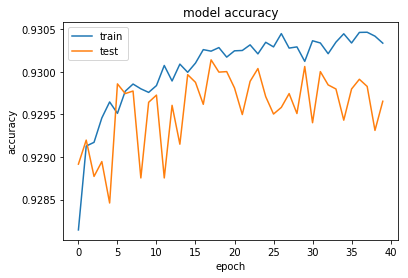

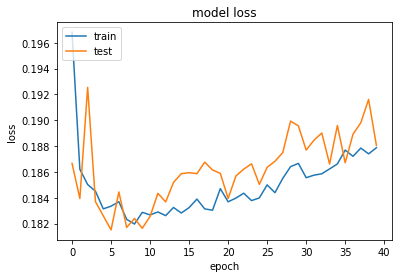

In [21]:
#https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The history for the validation dataset is labeled test by convention as it is indeed a test dataset for the model.

From the plot of accuracy we can see that the model could probably be trained a little more as the trend for accuracy on both datasets is still rising for the last few epochs. We can also see that the model has not yet over-learned the training dataset, showing comparable skill on both datasets.

From the plot of loss, we can see that the model has comparable performance on both train and validation datasets (labeled test) between 1 and 3 epochs. If these parallel plots start to depart consistently, it might be a sign to stop training at an earlier epoch.

You should keep training until your loss stops improving

In [22]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=1)

166746/166746 [==============================] - 6s 37us/step


# Quantify our Trained Model

In [23]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical,  verbose=1)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

166746/166746 [==============================] - 6s 36us/step
Normal Neural Network - Loss: 0.1880490933159047, Accuracy: 0.9296534849368785


# Make Predictions

In [24]:
encoded_predictions = model.predict_classes(X_test_scaled)
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

In [25]:
# print(f"Predicted classes: {prediction_labels}")
# print(f"Actual Labels: {list(y_test)}")

In [26]:
encoded_predictions = model.predict_classes(X_test_scaled)
prediction_labels = label_encoder.inverse_transform(encoded_predictions)
y_test_categorical[:,1]

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test_categorical[:,1], prediction_labels))

              precision    recall  f1-score   support

         0.0       0.53      0.12      0.20     11911
         1.0       0.94      0.99      0.96    154835

   micro avg       0.93      0.93      0.93    166746
   macro avg       0.73      0.56      0.58    166746
weighted avg       0.91      0.93      0.91    166746



In [28]:
# A = y_test_categorical[:,1].astype(np.float)

A = np.asfarray(y_test_categorical[:,1], float)

np.around(A,decimals=1)

array([1., 1., 1., ..., 1., 1., 1.])

In [29]:

df4 = pd.DataFrame({"Prediction": prediction_labels, "Actual": y_test_categorical[:,1]}).reset_index(drop=True)

In [30]:
df4.head(10)

Prediction  Actual
0           1     1.0
1           1     1.0
2           1     1.0
3           1     1.0
4           1     1.0
5           1     1.0
6           1     1.0
7           1     1.0
8           1     1.0
9           1     1.0

# Passing Real Time Feature Data for Testing on the Model.

In [31]:
inputs = {'country_India' : 1, 'gender_male' : 1, 'activity_Agriculture' : 1}

test = pd.Series(index=df2.columns)
for key in inputs.keys():
    test[key] = inputs[key]
    
test.fillna(0, inplace=True)

In [32]:
test1 = test.drop(['status'])

In [33]:
encoded_predictions = model.predict_classes(test1.values.reshape(1, -1))
prediction_labels = label_encoder.inverse_transform(encoded_predictions)
print(f"Predicted classes: {prediction_labels}")

predictions = model.predict_proba(test1.values.reshape(1, -1))
print (predictions)
print (predictions.round(decimals=4))

Predicted classes: [1]
[[5.083707e-09 1.000000e+00]]
[[0. 1.]]


# Retraining the model with lower epochs

Train on 500238 samples, validate on 166746 samples
Epoch 1/6
500238/500238 [==============================] - 76s 151us/step - loss: 0.1938 - acc: 0.9304 - val_loss: 0.1951 - val_acc: 0.9300
Epoch 2/6
500238/500238 [==============================] - 76s 151us/step - loss: 0.1921 - acc: 0.9303 - val_loss: 0.1911 - val_acc: 0.9301
Epoch 3/6
500238/500238 [==============================] - 75s 150us/step - loss: 0.1936 - acc: 0.9305 - val_loss: 0.1938 - val_acc: 0.9300
Epoch 4/6
500238/500238 [==============================] - 75s 150us/step - loss: 0.1919 - acc: 0.9304 - val_loss: 0.1930 - val_acc: 0.9297
Epoch 5/6
500238/500238 [==============================] - 75s 150us/step - loss: 0.1927 - acc: 0.9305 - val_loss: 0.1956 - val_acc: 0.9296
Epoch 6/6
500238/500238 [==============================] - 75s 150us/step - loss: 0.1924 - acc: 0.9303 - val_loss: 0.1956 - val_acc: 0.9297
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


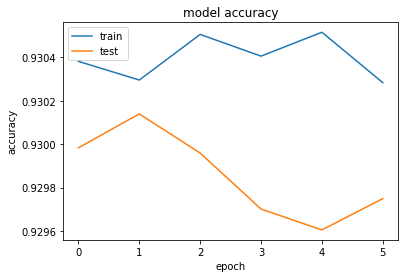

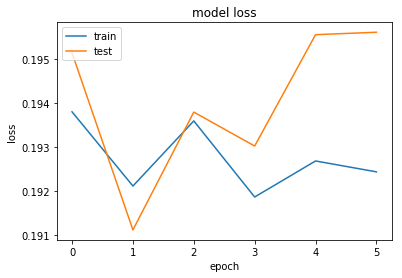

In [37]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history1 = model.fit(
    X_train_scaled,
    y_train_categorical,
    validation_data = (X_test_scaled, y_test_categorical),
    epochs=6,
    shuffle=True,
    verbose=1
)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [38]:
encoded_predictions = model.predict_classes(X_test_scaled)
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

print(classification_report(y_test_categorical[:,1], prediction_labels))

              precision    recall  f1-score   support

         0.0       0.54      0.10      0.17     11911
         1.0       0.93      0.99      0.96    154835

   micro avg       0.93      0.93      0.93    166746
   macro avg       0.74      0.55      0.57    166746
weighted avg       0.91      0.93      0.91    166746



# Saving a Trained Model
We can save our trained models using the HDF5 binary format with the extension .h5

In [39]:
# Save the model
model.save("ML-Model-Set1-5-KerasDeepLearning-model-trained.h5")